# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [22]:
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    city_url = url + "&q=" + city.replace(" ","+")
    
    time.sleep(1)
    
    try:
        city_weather = requests.get(city_url).json()
        print(city_url)
    
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_description = city_weather["weather"][0]["description"]

        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Current Description": city_weather_description,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=korop
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=new+norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=laiagam
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=acarau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=hilo
http://api.openweathe

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=kuche
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=inuvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=brownwood
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=kamenskoye
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=marsh+harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=provideniya
http://api.openweathermap.org/data/2.5/weather?

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=aras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=port+elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=roanoke+rapids
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=bam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=thai+binh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=a

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=mandal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=kroya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=puteyets
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=kefamenanu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=ilhabela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=s

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=hof
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=quetzaltepec
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=bentong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=parit+buntar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=port+blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=wasilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9ad

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=la+reforma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=sarakhs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=mocambique
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=port+hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=ati
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=surok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=pochutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=pedernales
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=sao+domingos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=meyungs
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=grand+gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=maneadero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=arcata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=korhogo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=dubbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=rossland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=kegayl

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=gimbi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=dali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=tefe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=sumbawa
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=grand-lahou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f136a4156e5&q=swellendam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9adca80c92df15434d94f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
df = pd.DataFrame(city_data)
df

,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country
0,Tuktoyaktuk,69.4541,-133.0374,24.80,light snow,80,100,28.77,CA
1,Korop,51.5664,32.9586,26.10,overcast clouds,59,100,12.35,UA
2,Mataura,-46.1927,168.8643,63.03,overcast clouds,50,98,10.85,NZ
3,New Norfolk,-42.7826,147.0587,59.92,overcast clouds,50,99,1.79,AU
4,Acarau,-2.8856,-40.1200,79.90,few clouds,78,11,16.93,BR
...,...,...,...,...,...,...,...,...,...
543,Teguldet,57.3064,88.1667,-3.08,overcast clouds,94,98,6.42,RU
544,Front Royal,38.9182,-78.1944,61.32,overcast clouds,55,100,13.80,US
545,Ust-Kulom,61.6864,53.6902,5.22,overcast clouds,99,89,3.98,RU
546,Deputatskiy,69.3000,139.9000,-13.94,overcast clouds,87,100,8.01,RU


In [24]:
#method to convert the dataframe to a csv
df.to_csv("city_weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
key = df["Humidity"]<100
df[key]
df2 = df[key]
df2

,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country
0,Tuktoyaktuk,69.4541,-133.0374,24.80,light snow,80,100,28.77,CA
1,Korop,51.5664,32.9586,26.10,overcast clouds,59,100,12.35,UA
2,Mataura,-46.1927,168.8643,63.03,overcast clouds,50,98,10.85,NZ
3,New Norfolk,-42.7826,147.0587,59.92,overcast clouds,50,99,1.79,AU
4,Acarau,-2.8856,-40.1200,79.90,few clouds,78,11,16.93,BR
...,...,...,...,...,...,...,...,...,...
543,Teguldet,57.3064,88.1667,-3.08,overcast clouds,94,98,6.42,RU
544,Front Royal,38.9182,-78.1944,61.32,overcast clouds,55,100,13.80,US
545,Ust-Kulom,61.6864,53.6902,5.22,overcast clouds,99,89,3.98,RU
546,Deputatskiy,69.3000,139.9000,-13.94,overcast clouds,87,100,8.01,RU


In [26]:
#  Get the indices of cities that have humidity over 100%.
df["Humidity"]
df[df["Humidity"]>100].index
indices = df[df["Humidity"]>100].index

In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers 
#by index.
df.drop(indices)
# Passing "inplace=False" will make a copy of the city_data DataFrame, 
#which we call "clean_city_data".
clean_city_data = df.drop(indices)
clean_city_data

,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country
0,Tuktoyaktuk,69.4541,-133.0374,24.80,light snow,80,100,28.77,CA
1,Korop,51.5664,32.9586,26.10,overcast clouds,59,100,12.35,UA
2,Mataura,-46.1927,168.8643,63.03,overcast clouds,50,98,10.85,NZ
3,New Norfolk,-42.7826,147.0587,59.92,overcast clouds,50,99,1.79,AU
4,Acarau,-2.8856,-40.1200,79.90,few clouds,78,11,16.93,BR
...,...,...,...,...,...,...,...,...,...
543,Teguldet,57.3064,88.1667,-3.08,overcast clouds,94,98,6.42,RU
544,Front Royal,38.9182,-78.1944,61.32,overcast clouds,55,100,13.80,US
545,Ust-Kulom,61.6864,53.6902,5.22,overcast clouds,99,89,3.98,RU
546,Deputatskiy,69.3000,139.9000,-13.94,overcast clouds,87,100,8.01,RU


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

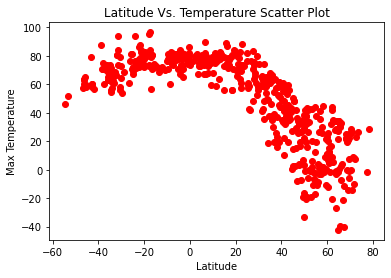

In [32]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Max Temp']
plt.scatter(x_values, y_values, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude Vs. Temperature Scatter Plot')
plt.show()

## Latitude vs. Humidity Plot

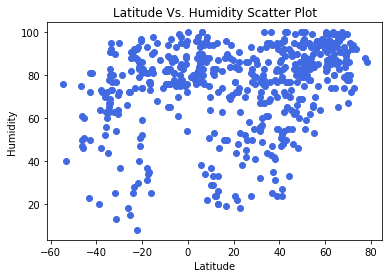

In [33]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Humidity']
plt.scatter(x_values, y_values, color="royalblue")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs. Humidity Scatter Plot')
plt.show()

## Latitude vs. Cloudiness Plot

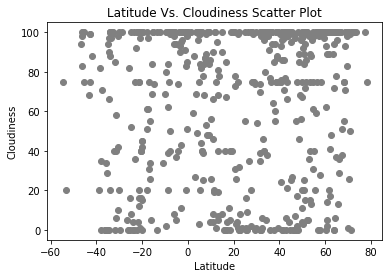

In [34]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Cloudiness']
plt.scatter(x_values, y_values, color="gray")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs. Cloudiness Scatter Plot')
plt.show()

## Latitude vs. Wind Speed Plot

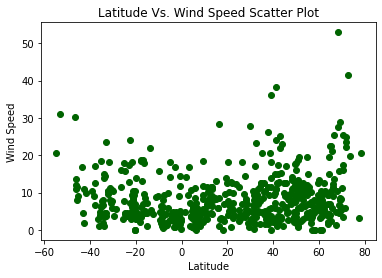

In [35]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Wind Speed']
plt.scatter(x_values, y_values, color="darkgreen")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude Vs. Wind Speed Scatter Plot')
plt.show()

## Linear Regression

In [36]:
north_hem= clean_city_data[clean_city_data['Lat'] > 0]
south_hem= clean_city_data[clean_city_data['Lat'] < 0]

In [37]:
north_hem.count()

City                   381
Lat                    381
Lng                    381
Max Temp               381
Current Description    381
Humidity               381
Cloudiness             381
Wind Speed             381
Country                381
dtype: int64

In [38]:
south_hem.count()

City                   167
Lat                    167
Lng                    167
Max Temp               167
Current Description    167
Humidity               167
Cloudiness             167
Wind Speed             167
Country                167
dtype: int64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [42]:
x_values= north_hem['Lat']
y_values= north_hem['Max Temp']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0       2.651961
1      25.338397
5      20.040706
6      65.715935
9      36.710089
         ...    
542    23.245244
543    18.058527
544    41.379733
545    12.503503
546     2.847401
Name: Lat, Length: 381, dtype: float64


In [43]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.27x +90.74


The r-value is: 0.7003551774611939


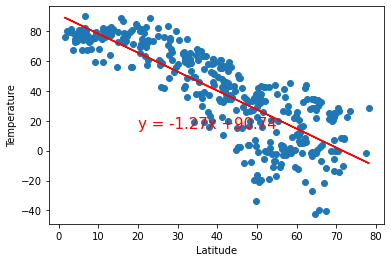

In [44]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [45]:
x_values= south_hem['Lat']
y_values= south_hem['Max Temp']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

2      63.887842
3      65.120701
4      79.544732
7      65.450743
8      72.229246
         ...    
532    79.451637
533    74.550388
537    75.201037
539    77.390870
547    74.578298
Name: Lat, Length: 167, dtype: float64


In [46]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.36x +80.59


The r-value is: 0.3092791425775863


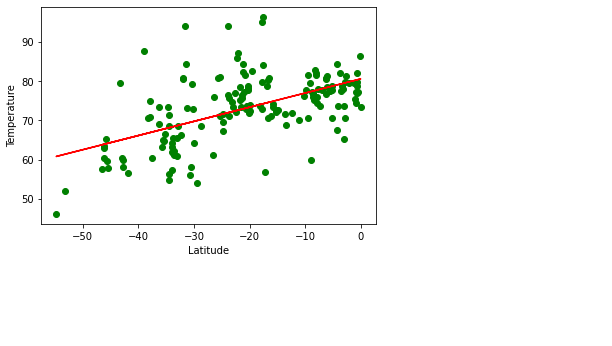

In [49]:
# Create Plot
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [50]:
x_values= north_hem['Lat']
y_values= north_hem['Humidity']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      86.165149
1      80.558481
5      81.867739
6      70.579681
9      77.748111
         ...    
542    81.075778
543    82.357610
544    76.594067
545    83.730464
546    86.116848
Name: Lat, Length: 381, dtype: float64


In [51]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.31x +64.4


The r-value is: 0.10291446873348893


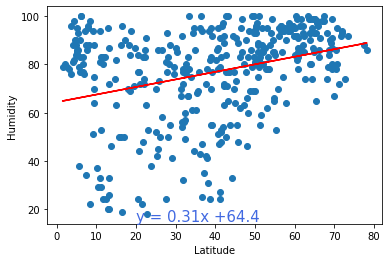

In [52]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="royalblue")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [57]:
x_values= south_hem['Lat']
y_values= south_hem['Humidity']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

2      57.173089
3      59.169606
4      82.528173
7      59.704083
8      70.681328
         ...    
532    82.377414
533    74.440232
537    75.493905
539    79.040166
547    74.485430
Name: Lat, Length: 167, dtype: float64


In [54]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.59x +84.22


The r-value is: 0.15276216698107992


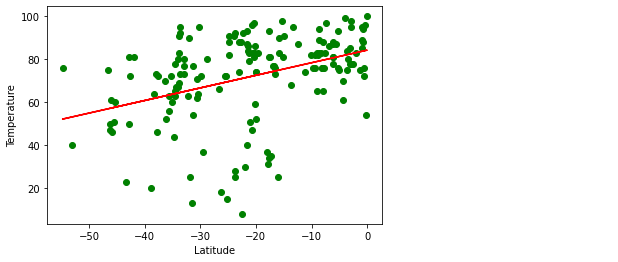

In [55]:
# Create Plot
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="royalblue")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [58]:
x_values= north_hem['Lat']
y_values= north_hem['Cloudiness']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      74.085468
1      68.988075
5      70.178408
6      59.915685
9      66.432981
         ...    
542    69.458384
543    70.623782
544    65.383763
545    71.871935
546    74.041555
Name: Lat, Length: 381, dtype: float64


In [59]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.28x +54.29


The r-value is: 0.022994855669448384


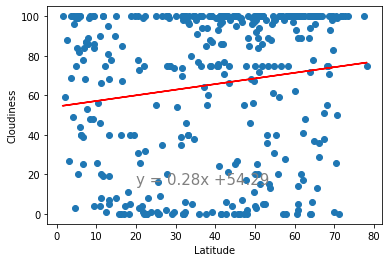

In [60]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="gray")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [61]:
x_values= south_hem['Lat']
y_values= south_hem['Cloudiness']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

2      53.203736
3      54.543265
4      70.215289
7      54.901863
8      62.266854
         ...    
532    70.114140
533    64.788826
537    65.495770
539    67.875072
547    64.819151
Name: Lat, Length: 167, dtype: float64


In [62]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.39x +71.35


The r-value is: 0.019739125850694213


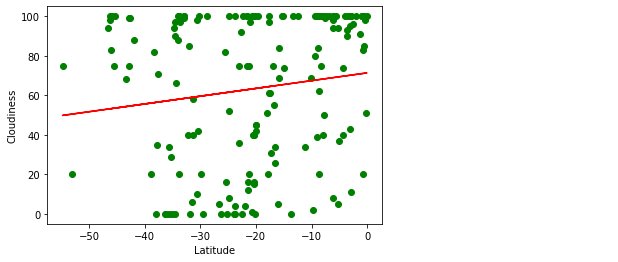

In [64]:
# Create Plot
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="gray")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [65]:
x_values= north_hem['Lat']
y_values= north_hem['Wind Speed']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      10.788181
1       9.417947
5       9.737922
6       6.979193
9       8.731111
         ...    
542     9.544371
543     9.857643
544     8.449070
545    10.193160
546    10.776377
Name: Lat, Length: 381, dtype: float64


In [66]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.08x +5.47


The r-value is: 0.05157471380513219


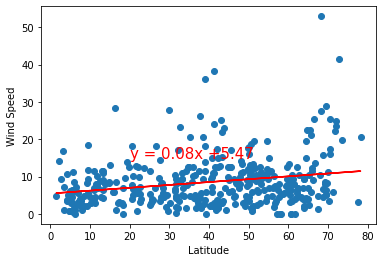

In [67]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [68]:
x_values= south_hem['Lat']
y_values= south_hem['Wind Speed']
# Perform a linear regression on temp v. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

2      11.902549
3      11.339395
4       4.750686
7      11.188636
8       8.092304
         ...    
532     4.793211
533     7.032037
537     6.734829
539     5.734542
547     7.019288
Name: Lat, Length: 167, dtype: float64


In [69]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.17x +4.27


The r-value is: 0.13821276170320873


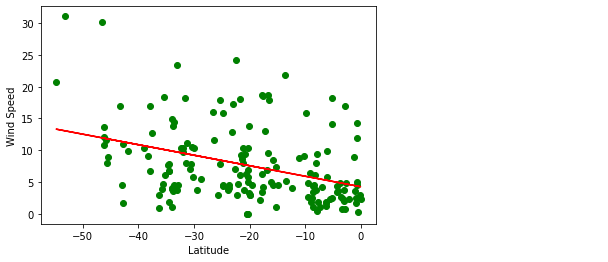

In [70]:
# Create Plot
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()